# MAT281 - Laboratorios N°07

<a id='p1'></a>
## I.- Problema 01


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/b/b6/Anscombe.svg/1200px-Anscombe.svg.png" width="360" height="360" align="center"/>



El **cuarteto de Anscombe** comprende cuatro conjuntos de datos que tienen las mismas propiedades estadísticas, pero que evidentemente son distintas al inspeccionar sus gráficos respectivos.

Cada conjunto consiste de once puntos (x, y) y fueron construidos por el estadístico F. J. Anscombe. El cuarteto es una demostración de la importancia de mirar gráficamente un conjunto de datos antes de analizarlos.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_palette("deep", desat=.6)
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [2]:
# cargar datos
df = pd.read_csv(os.path.join("data","anscombe.csv"), sep=",")
df.head()

,x,y,grupo
0,10,8.04,Grupo_1
1,8,6.95,Grupo_1
2,13,7.58,Grupo_1
3,9,8.81,Grupo_1
4,11,8.33,Grupo_1


Basado en la información presentada responda las siguientes preguntas:

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.
2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.
3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.
4. Calcule los resultados de las métricas para cada grupo. Interprete.
5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario.  

1. Gráfique mediante un gráfico tipo **scatter** cada grupo. A simple vista, ¿ los grupos son muy distintos entre si?.

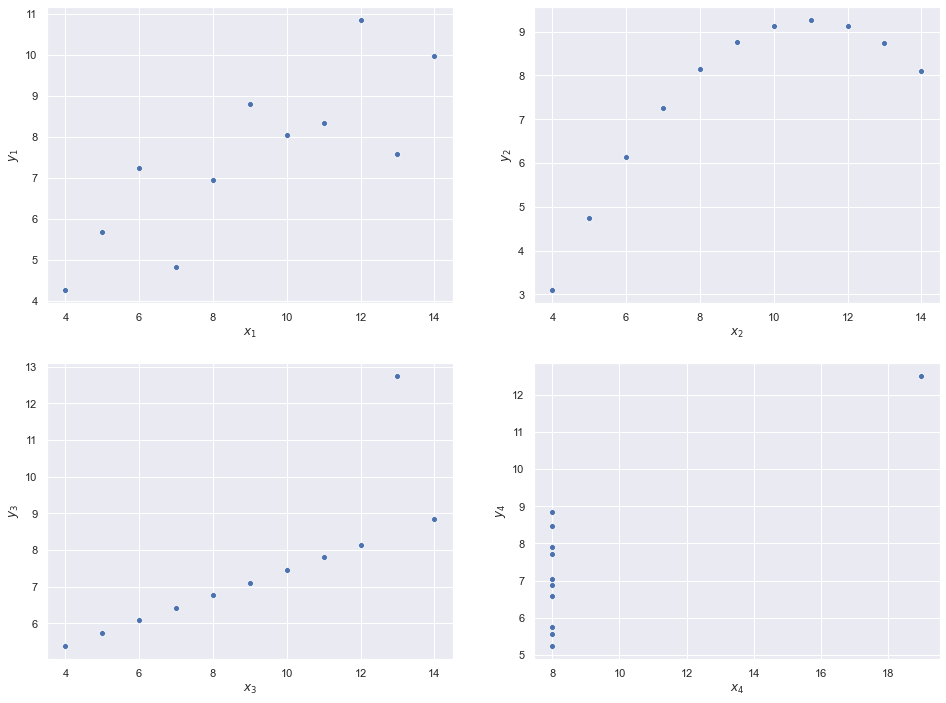

In [3]:
fig = plt.figure(figsize=(16, 12)) # tamaño del grafico

plt.subplot(2,2,1)#posición del grafico
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) #Grafico del grupo 1
plt.xlabel('$x_1$')
plt.ylabel('$y_1$')

plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2']) #Grafico del grupo 2
plt.xlabel('$x_2$')
plt.ylabel('$y_2$')

plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3']) #Grafico del grupo 3
plt.xlabel('$x_3$')
plt.ylabel('$y_3$')

plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4']) #Grafico del grupo 4
plt.xlabel('$x_4$')
plt.ylabel('$y_4$')

plt.show()

Notamos que los graficos son muy distintos entre si.

2. Realice un resumen de las medidas estadísticas más significativas ocuapando el comando **describe** para cada grupo. Interprete.

In [4]:
df.groupby(['grupo']).describe() #Vemos las estadísticas de los grupos

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
grupo                                                                     
Grupo_1  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_2  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
Grupo_3  11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
Grupo_4  11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
grupo                                              
Grupo_1  2.031568  4.26  6.315  7.58  8.57  10.84  
Grupo_2  2.031657  3.10  6.695  8.14  8.95   9.26  
Grupo_3  2.030424  5.39  6.250  7.11  7.98  12.74  
Grupo_4  2.030579  5.25  6.170  7.04  8.19  12.50

Notamos que las estadísticas son practicamente iguales

3. Realice un ajuste lineal para cada grupo. Además, grafique los resultados de la regresión lineal para cada grupo. Interprete.

In [5]:
# importando el modelo de regresión lineal
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Creamos 4 modelos
#Modelo 1:
model_rl1 = LinearRegression()
x1 = df[df['grupo'] == 'Grupo_1'][['x']]
y1 = df[df['grupo'] == 'Grupo_1']['y']
X1_train, X1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.33, random_state=42)

model_rl1.fit(X1_train,y1_train)

#Modelo 2:
model_rl2 = LinearRegression() 
x2 = df[df['grupo'] == 'Grupo_2'][['x']]
y2 = df[df['grupo'] == 'Grupo_2']['y']
X2_train, X2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.33, random_state=42)

model_rl2.fit(X2_train,y2_train)

#Modelo 3:
model_rl3 = LinearRegression() 
x3 = df[df['grupo'] == 'Grupo_3'][['x']]
y3 = df[df['grupo'] == 'Grupo_3']['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(X3_train,y3_train)

#Modelo 4:
model_rl4 = LinearRegression() 
x4 = df[df['grupo'] == 'Grupo_4'][['x']]
y4 = df[df['grupo'] == 'Grupo_4']['y']
X4_train, X4_test, y4_train, y4_test = train_test_split(x4, y4, test_size=0.33, random_state=42)

model_rl4.fit(X4_train,y4_train)

LinearRegression()

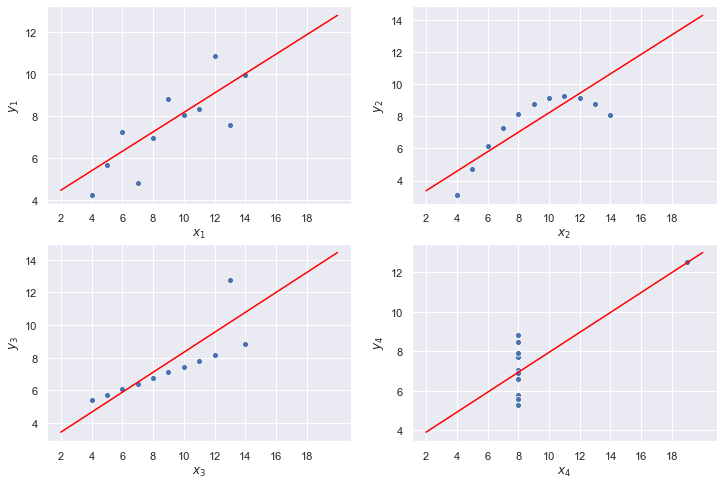

In [6]:
# Lista de coeficientes beta para cada modelo:
i1 = round(model_rl1.intercept_,4)#Intercepto
m1 = round(model_rl1.coef_[0],4)#Pendiente

i2 = round(model_rl2.intercept_,4)#Intercepto
m2 = round(model_rl2.coef_[0],4)#Pendiente

i3 = round(model_rl3.intercept_,4)#Intercepto
m3 = round(model_rl3.coef_[0],4)#Pendiente

i4 = round(model_rl4.intercept_,4)#Intercepto
m4 = round(model_rl4.coef_[0],4)#Pendiente

#Defincion de las rectas:
x1_range = np.arange(2,21,1)
y1_range=[i1 + m1*n for n in x1_range]
y2_range=[i2 + m2*n for n in x1_range]
y3_range=[i3 + m3*n for n in x1_range]
y4_range=[i4 + m4*n for n in x1_range]

#Definición de dataFrames para graficar cada ajuste:
df_plot1 = pd.DataFrame({'x':x1_range,
                        'y':y1_range})
df_plot2 = pd.DataFrame({'x':x1_range,
                        'y':y2_range})
df_plot3 = pd.DataFrame({'x':x1_range,
                        'y':y3_range})
df_plot4 = pd.DataFrame({'x':x1_range,
                        'y':y4_range})

#Se grafica:
fig = plt.figure(figsize=(12, 8)) # ventana

#Grafico 1:
plt.subplot(2,2,1)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_1']) 
sns.lineplot(x='x', y='y', data=df_plot1,color="red")
plt.xlabel('$x_1$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_1$')

#Grafico 2:
plt.subplot(2,2,2)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2'])
sns.lineplot(x='x', y='y', data=df_plot2,color="red")
plt.xlabel('$x_2$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_2$')

#Grafico 3:
plt.subplot(2,2,3)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_3'])
sns.lineplot(x='x', y='y', data=df_plot3,color="red")
plt.xlabel('$x_3$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_3$')

#Grafico 4:
plt.subplot(2,2,4)
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_4'])
sns.lineplot(x='x', y='y', data=df_plot4,color="red")
plt.xlabel('$x_4$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_4$')

plt.show()



Notemos que las rectas son practicamente iguales.

4. Calcule los resultados de las métricas para cada grupo. Interprete.

In [7]:
from metrics_regression import *
from sklearn.metrics import r2_score

#Metricas del grupo 1:
df_temp = pd.DataFrame({
        'y':y1_test,
        'yhat': model_rl1.predict(X1_test)
        })

df_metrics= summary_metrics(df_temp) #Se crea el dataframe de metricas ahora solo con el grupo 1
df_metrics['r2'] =  round(r2_score(y1_test, model_rl1.predict(X1_test)),4)

#Metricas del grupo 2:
df_temp = pd.DataFrame({
        'y':y2_test,
        'yhat': model_rl2.predict(X2_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y2_test, model_rl2.predict(X2_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 2 al ya existente 

#Metricas del grupo 3:
df_temp = pd.DataFrame({
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 3 al ya existente 

#Metricas del grupo 4:
df_temp = pd.DataFrame({
        'y':y4_test,
        'yhat': model_rl4.predict(X4_test)
        })
df_metrics_temp = summary_metrics(df_temp)
df_metrics_temp['r2'] =  round(r2_score(y4_test, model_rl4.predict(X4_test)),4)
df_metrics=pd.concat([df_metrics,df_metrics_temp]) #Se agrega el dataframe de metricas del grupo 4 al ya existente 

grupos = pd.Series(['Grupo_1','Grupo_2','Grupo_3', 'Grupo_4']) #Se cambia el indice para mostrar cada grupo
df_metrics.set_index(keys=grupos)
df_metrics

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.5907,0.9878,0.9939,0.1165,0.1113,0.0829,0.0971,0.0990,0.7572
0,1.1934,2.0670,1.4377,0.1569,0.1541,0.1633,0.1381,0.1484,0.2186
0,0.8342,1.1773,1.0850,0.1067,0.1057,0.1173,0.0943,0.1005,0.1432
0,0.3700,0.2736,0.5230,0.0496,0.0495,0.0521,0.0437,0.0514,-0.1234


Notemos que para el grupo 1 (fila 1) es la que tiene r2 más alejada de 0, mientras que los otros están muy cercanos a 0, por 

5. Es claro que el ajuste lineal para algunos grupos no es el correcto. Existen varias formas de solucionar este problema (eliminar outliers, otros modelos, etc.). Identifique una estrategia para que el modelo de regresión lineal ajuste de mejor manera e implemente otros modelos en los casos que encuentre necesario. 

Notemos que la aproximación para el grupo 1 es aceptable, procedemos a partir del grupo 2.

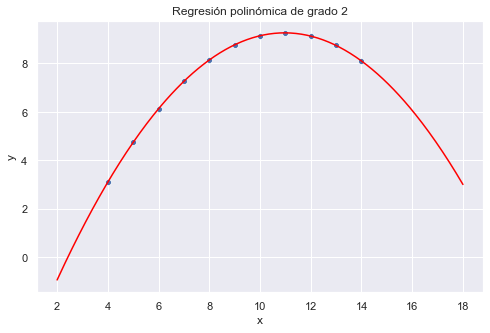

In [8]:
#Tratamos de aproximar mediante un polinomio de grado 2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree=2 #grado del polinomio de regresion
polyreg=make_pipeline(PolynomialFeatures(degree),LinearRegression()) #Creacion del modelo 
polyreg.fit(X2_train,y2_train) #Se usan los datos train creados en Pregunta 3

#Definiciones para graficar el ajuste
X_seq = np.linspace(2,18,300).reshape(-1,1)

#Se grafica:
plt.figure(figsize=(8,5))
sns.scatterplot(x='x', y='y', data=df[df['grupo'] == 'Grupo_2']) 
plt.plot(X_seq,polyreg.predict(X_seq),color="red")
plt.title("Regresión polinómica de grado "+str(degree))
plt.show()

In [9]:
#Se presentan las nuevas metricas con el ajuste cuadrático
df_temp = pd.DataFrame({
        'y':y2_test,
        'yhat': polyreg.predict(X2_test)
        })

df_metrica2 = summary_metrics(df_temp)
df_metrica2['r2'] =  round(r2_score(y2_test, polyreg.predict(X2_test)),4)
df_metrica2.set_index(pd.Series({'Grupo_2':'Grupo_2'}))



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_2,0.0013,0.0,0.0015,0.0002,0.0002,0.0002,0.0002,0.0002,1.0


Notamos como mejoraron los errores.

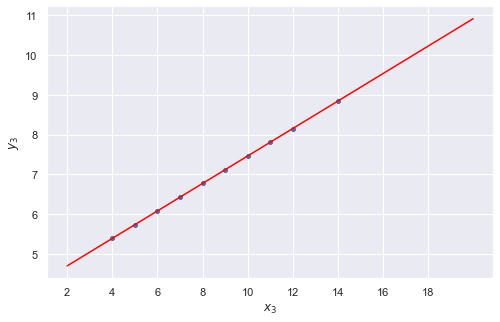

In [10]:
#Se elimina el dato anómalo:
df_nuevo = df[df['grupo'] == 'Grupo_3'].drop(24)

#Se crea un nuevo ajuste ahora para los datos sin el outlier:
model_rl3 = LinearRegression()
x3 = df_nuevo[['x']]
y3 = df_nuevo['y']
X3_train, X3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.33, random_state=42)

model_rl3.fit(X3_train,y3_train)

#Definición de los coef del ajuste
beta_3_0 = round(model_rl3.intercept_,4)
beta_3_1 = round(model_rl3.coef_[0],4)

#Definciones para Graficar el ajuste:
x_range = np.arange(2,21,1)
y3_range=[beta_3_0 + beta_3_1*n for n in x_range]

df_plot3 = pd.DataFrame({'x':x_range,
                        'y':y3_range})

#Grafico con el ajuste y los datos de df_nuevo:
fig = plt.figure(figsize=(8, 5)) # ventana

sns.scatterplot(x='x', y='y', data=df_nuevo) #Datos originales sin el outlier
sns.lineplot(x='x', y='y', data=df_plot3,color="red") #Ajuste lineal
plt.xlabel('$x_3$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_3$')
plt.show()

In [11]:
#Se presentan las nuevas metricas con los datos actualizados quitando el outlier

df_temp = pd.DataFrame({
        'y':y3_test,
        'yhat': model_rl3.predict(X3_test)
        })
df_metrica3= summary_metrics(df_temp)
df_metrica3['r2'] =  round(r2_score(y3_test, model_rl3.predict(X3_test)),4)
df_metrica3.set_index(pd.Series({'Grupo_3':'Grupo_3'}))



,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
Grupo_3,0.0018,0.0,0.0021,0.0003,0.0003,0.0003,0.0002,0.0003,1.0


Al quitar el dato anomalo mejoro enormemente

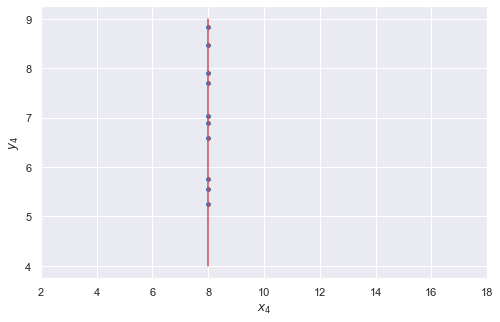

In [12]:
#Definicion del dataframe sin el outlier
df_nuevo4 = df[df['grupo'] == 'Grupo_4'].drop(40)

#Defincion del nuevo modelo
model_rl4_nuevo = LinearRegression() # Creando el modelo.
x4 = df_nuevo4['x']
y4 = df_nuevo4[['y']]
X4_train, X4_test, y4_train, y4_test = train_test_split(y4, x4, test_size=0.33, random_state=42)

model_rl4_nuevo.fit(X4_train,y4_train)

#Definición de los coef del nuevo ajuste:
beta_4_0_nuevo = round(model_rl4_nuevo.intercept_,4)
beta_4_1_nuevo = round(model_rl4_nuevo.coef_[0],4)

#Definiciones para graficar el ajuste
x_range = np.arange(4,10,1)
y4_range=[beta_4_0_nuevo + beta_4_1_nuevo*n for n in x_range]

df_plot4_nuevo = pd.DataFrame({'x':x_range,
                        'y':y4_range})

#Se grafica:
plt.figure(figsize=(8,5))

sns.scatterplot(x='x', y='y', data=df_nuevo4)
plt.plot(y4_range, x_range,'r')
plt.xlabel('$x_4$')
plt.xticks([2*x for x in range(1,10)])
plt.ylabel('$y_4$')
plt.show()

In [13]:
#Se presentan las nuevas metricas con los datos actualizados quitando el outlier
df_temp = pd.DataFrame(
    {
        'y':y4_test,
        'yhat': model_rl4_nuevo.predict(X4_test)
        }
)
df_metrica4 = summary_metrics(df_temp)
df_metrica4['r2'] =  round(r2_score(y4_test, model_rl4_nuevo.predict(X4_test)),4)
df_metrica4.set_index(pd.Series({'Grupo_4':'Grupo_4'}))
df_metrica4

,mae,mse,rmse,mape,maape,wmape,mmape,smape,r2
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
